# Tips Dataset Features

In this section, we outline the features of the tips dataset used for analysis.

## Selected Features

The features included in the dataset are:

- **total_bill**: Total bill amount (in dollars)
- **sex**: Gender of the customer (e.g., Male, Female)
- **smoker**: Indicates whether the customer is a smoker (Yes or No)
- **day**: Day of the week when the meal occurred (e.g., Th, Fri, Sat, Sun)
- **time**: Time of day when the meal occurred (e.g., Lunch or Dinner)
- **size**: Size of the party (number of people)

## Target Variable

The target variable for prediction is:
- **tip**: This represents the tip given by the customer (in dollars).


Mean Squared Errors:
Linear Regression: 0.66
Decision Tree: 1.51
Random Forest: 0.95
Gradient Boosting: 0.72
AdaBoost: 0.96
Extra Trees: 1.12
Voting Ensemble: 0.81


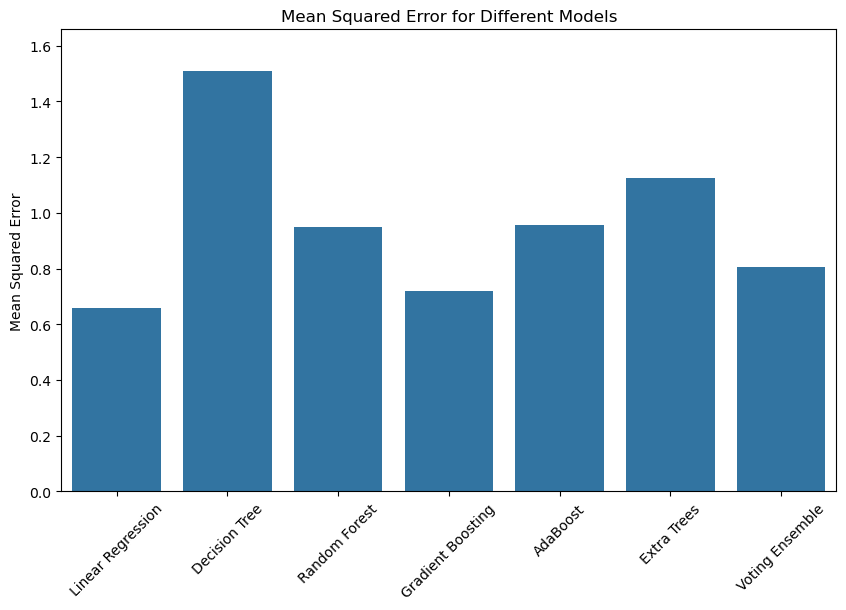

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset
df = sns.load_dataset('tips')

# Convert categorical variables to numerical
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['day'] = le.fit_transform(df['day'])
df['time'] = le.fit_transform(df['time'])

# Features and target variable
X = df[['total_bill', 'size', 'sex', 'day', 'time']]
y = df['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Fit each model, predict, and calculate MSE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Ensemble model using Voting
voting_regressor = VotingRegressor(estimators=[(name, model) for name, model in models.items()])
voting_regressor.fit(X_train, y_train)

# Predict on the test set with the ensemble model
y_pred_voting = voting_regressor.predict(X_test)

# Mean Squared Error for the ensemble model
mse_voting = mean_squared_error(y_test, y_pred_voting)
results['Voting Ensemble'] = mse_voting

# Display results
print("Mean Squared Errors:")
for model, mse in results.items():
    print(f"{model}: {mse:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Mean Squared Error for Different Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.ylim(0, max(results.values()) * 1.1)  # Slightly extend y-axis for better visibility
plt.show()
